#Sistema de reconocimiento facial

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Carga y procesamiento de los datos

###Creo funciones utiles para el proceso en general

In [0]:
#importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                 
from PIL import Image
import time
from keras.models import load_model

#Funcion para cargar una imagen
def cargaImagen(ruta):
    
    imagen = cv2.imread(ruta)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    return imagen

#Funcio  para mostrar la imagen
def mostrarImagen(imagen, title=''):

    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax1.set_title(title)
    ax1.imshow(imagen)

Using TensorFlow backend.


##Código para detectar y pintar caras en una imagen

In [0]:

def detectarRostros(imagen):
  
    copiaImagen = np.copy(imagen)
    
    gray = cv2.cvtColor(copiaImagen, cv2.COLOR_RGB2GRAY)

    # Extraemos un detector de caras frontales preentrenado desde un fichero xml 
    clasificadorCaras = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/Detectores/haarcascade_frontalface_default.xml')
    

    caras = clasificadorCaras.detectMultiScale(gray, 1.2,4)
    
    return caras 

def pintarCaras(imagen, caras=None, plot=True):

    if caras is None:
        faces = detectarRostros(imagen)
        
    imagenConCaras = np.copy(imagen)
    
  
    for (x,y,w,h) in caras:
        cv2.rectangle(imagenConCaras, (x,y), (x+w,y+h), (255,0,0), 3)
        
    if plot is True:
        mostrarImagen(imagenConCaras)
    else:
        return imagenConCaras
    

Caras detectadas: 15


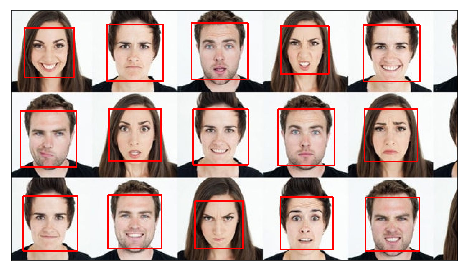

In [0]:
#Prueba de deteccion de caras
imagen = cargaImagen('/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/imagenes/Facial-1440x808.jpg')
caras = detectarRostros(imagen)
print("Caras detectadas: {}".format(len(caras)))
pintarCaras(imagen, caras)

##Proceso de Data augmentation

###Función para generar los sets de entrelamiento, test y validación 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
def dataaumentation():
  train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
  test_datagen = ImageDataGenerator(rescale=1./255)
  
  TrainDatagen = train_datagen.flow_from_directory( directory='/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/data/Imagenes seleccionadas',
                                                  class_mode='categorical',
                                                  batch_size=32)
  validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/data/imagenes  validacion',
      class_mode='categorical',
      batch_size=32)
  
  display(TrainDatagen)
  return TrainDatagen , validation_generator



###Función para generar imagentes aleatorias a partir de las que se tienen en archivo

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
def devolverArchivos1(carpeta):
  directory = carpeta 
  Numero = len([item for item in os.listdir(directory) if os.path.isfile(os.path.join(directory, item))])
  contador=0
  while(contador<=50):
    for archivo in os.listdir(carpeta):
      imagen=cv2.imread(os.path.join(carpeta,archivo))
      nuevaimagen=train_datagen.random_transform(imagen)
      #display(np.shape(nuevaimagen))
      cv2.imwrite(str(carpeta)+'/'+str(archivo)+str(contador)+'.png',nuevaimagen)
      contador=contador+1
      display('contador'+str(contador))

devolverArchivos1 ('/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/data/Imagenes seleccionadas/M35')
#devolverArchivos1('/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/data/imagenes  validacion/H5')

'contador1'

'contador2'

'contador3'

'contador4'

'contador5'

'contador6'

'contador7'

'contador8'

'contador9'

'contador10'

'contador11'

'contador12'

'contador13'

'contador14'

'contador15'

'contador16'

'contador17'

'contador18'

'contador19'

'contador20'

'contador21'

'contador22'

'contador23'

'contador24'

'contador25'

'contador26'

'contador27'

'contador28'

'contador29'

'contador30'

'contador31'

'contador32'

'contador33'

'contador34'

'contador35'

'contador36'

'contador37'

'contador38'

'contador39'

'contador40'

'contador41'

'contador42'

'contador43'

'contador44'

'contador45'

'contador46'

'contador47'

'contador48'

'contador49'

'contador50'

'contador51'

'contador52'

'contador53'

'contador54'

'contador55'

'contador56'

'contador57'

## Implementación y entrenamiento de la red neuronal convolucional

In [0]:
# Importamos librerias necesarias 
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense


# creo la capa de entrada que admite imagenes de 256 x 256
# Utilizo la arqitectura recomendada en clase para una red convolucional 
modelo = Sequential()
modelo.add(Convolution2D(16,(2,2),padding='same',input_shape=(256,256, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=3, data_format="channels_first"))

modelo.add(Convolution2D(32,(3,3),padding='same', activation='relu'))
modelo.add(MaxPooling2D(pool_size=3))
modelo.add(Dropout(0.2))

modelo.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
modelo.add(MaxPooling2D(pool_size=3))
modelo.add(Dropout(0.2))

modelo.add(Convolution2D(128,(3,3),padding='same', activation='relu'))
modelo.add(MaxPooling2D(pool_size=3))
modelo.add(Dropout(0.2))

modelo.add(Flatten())
modelo.add(Dense(256,activation='relu'))
modelo.add(Dropout(0.2))


modelo.add(Dense(50))


# Summarize the model
modelo.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 256, 85, 5)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 85, 32)       1472      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 85, 28, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 85, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 85, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 9, 64)        

In [0]:
modelo.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
#modelo.fit(X_train, y_train, validation_split=0.2,
 #             epochs=iteraciones, batch_size=20, callbacks=[checkpointer, histo], verbose=1)
  [TrainDatagen , validation_generator]=dataaumentation()
  modeloreconocimiento=modelo.fit_generator(
        TrainDatagen,
        steps_per_epoch=20,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=20)

Found 3629 images belonging to 50 classes.
Found 113 images belonging to 50 classes.


Epoch 1/50
20/20 [==============================] - 65s 3s/step - loss: 0.0266 - acc: 0.0250 - val_loss: 0.0199 - val_acc: 0.0088
Epoch 2/50
20/20 [==============================] - 59s 3s/step - loss: 0.0198 - acc: 0.0312 - val_loss: 0.0197 - val_acc: 0.0531
Epoch 3/50
20/20 [==============================] - 59s 3s/step - loss: 0.0196 - acc: 0.0312 - val_loss: 0.0196 - val_acc: 0.0354
Epoch 4/50
20/20 [==============================] - 59s 3s/step - loss: 0.0196 - acc: 0.0437 - val_loss: 0.0196 - val_acc: 0.0531
Epoch 5/50
20/20 [==============================] - 58s 3s/step - loss: 0.0195 - acc: 0.0319 - val_loss: 0.0196 - val_acc: 0.0000e+00
Epoch 6/50
20/20 [==============================] - 59s 3s/step - loss: 0.0195 - acc: 0.0500 - val_loss: 0.0195 - val_acc: 0.0265
Epoch 7/50
20/20 [==============================] - 59s 3s/step - loss: 0.0194 - acc: 0.0844 - val_loss: 0.0194 - val_acc: 0.0973
Epoch 8/50
20/20 [==============================] - 59s 3s/step - loss: 0.0193 - acc: 

##Evaliúo el modelo

In [0]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


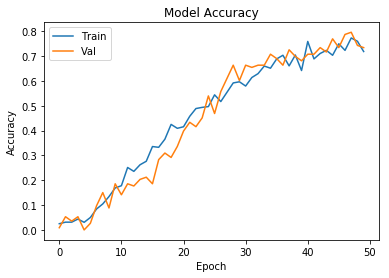

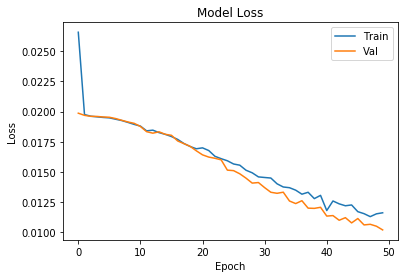

In [0]:
plot_acc(modeloreconocimiento, title="Model Accuracy")
plot_loss(modeloreconocimiento, title="Model Loss")

In [0]:
#imagen = cargaImagen('/content/drive/My Drive/Colab Notebooks/ReconocimientoFacial/data/imagenes  validacion/H3/imagen375.png')
#imagen=np.reshape(imagen,(256,256))
predicciones=modelo.predict_generator(validation_generator)
display(np.shape(predicciones))
display(predicciones)

(113, 50)

array([[-0.04096945, -0.00757294, -0.01224531, ...,  0.05421081,
        -0.00914396, -0.01475854],
       [-0.00307026,  0.00777228,  0.00343721, ...,  0.11900993,
         0.02877297, -0.02457399],
       [-0.05944159, -0.07533005,  0.13807525, ...,  0.05719187,
         0.00046855, -0.00635799],
       ...,
       [ 0.03846604,  0.01270295,  0.04737038, ..., -0.01757442,
        -0.02478404, -0.00558796],
       [-0.0039924 , -0.04469779, -0.06700476, ..., -0.00576812,
         0.03285024, -0.00331339],
       [-0.01336987,  0.241985  , -0.05254251, ...,  0.062981  ,
        -0.05022545,  0.00885088]], dtype=float32)